<a href="https://colab.research.google.com/github/sumaiya-akter-runa/maternal_health_risk_dataset/blob/main/maternal_risk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Importing Libraries and **Dataset**

In [ ]:
import numpy as np
import pandas as pd
from google.colab import drive
from google.colab import files
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt # data visualization
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
import seaborn as sns # statistical data visualization
sns.set(style='whitegrid',color_codes=True)
import warnings as war
war.filterwarnings('ignore')
from sklearn import tree
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.metrics import accuracy_score
from IPython.display import Image
import pydotplus
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn import datasets
#from sklearn.datasets import load_boston
from sklearn.datasets import load_diabetes


from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 2. Exploratory data **analysis**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
dataset = pd.read_csv("/content/drive/MyDrive/ml_squad/Maternal_Health_Risk_Dataset/maternal _health.csv")

In [ ]:
dataset.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk


In [ ]:
dataset.isnull().sum().sum()

np.int64(0)

In [ ]:
dataset['RiskLevel'].unique()

array(['high risk', 'low risk', 'mid risk'], dtype=object)

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1014 non-null   int64  
 1   SystolicBP   1014 non-null   int64  
 2   DiastolicBP  1014 non-null   int64  
 3   BS           1014 non-null   float64
 4   BodyTemp     1014 non-null   float64
 5   HeartRate    1014 non-null   int64  
 6   RiskLevel    1014 non-null   object 
dtypes: float64(2), int64(4), object(1)
memory usage: 55.6+ KB


In [ ]:
dataset.shape

(1014, 7)

In [ ]:
print(dataset.columns)


Index(['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate',
       'RiskLevel'],
      dtype='object')


# 3. Separating Features and **Target**

In [ ]:
X = dataset.drop(['RiskLevel'],axis=1)
y = dataset['RiskLevel']

In [ ]:
X = pd.get_dummies(X)
X.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
0,25,130,80,15.0,98.0,86
1,35,140,90,13.0,98.0,70
2,29,90,70,8.0,100.0,80
3,30,140,85,7.0,98.0,70
4,35,120,60,6.1,98.0,76


In [ ]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
y = encoder.fit_transform(y)
print(y)

[0 0 0 ... 0 0 2]


# 4. Splitting Dataset to training and test **data**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [ ]:
X_train.shape , X_test.shape

((811, 6), (203, 6))

In [ ]:
y_train.shape , y_test.shape

((811,), (203,))

# 5. Decision Tree **Creation**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [ ]:
from sklearn.metrics import accuracy_score

# 6. Creation of Decision Tree using Gini **Index**

In [ ]:
#Using the Decision Tree Classifier with splitting criterion as Gini impurity, the maximum depth of the tree is 3.
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)


# fit the model
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [ ]:
clf_gini = DecisionTreeClassifier(criterion='gini', random_state=42)
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
#Predict the values
y_pred_gini = clf_gini.predict(X_test)

In [ ]:
#Predict the value using X train for accuracy comparision
y_pred_train_gini = clf_gini.predict(X_train)

y_pred_train_gini

array([2, 2, 2, 2, 0, 2, 2, 0, 2, 1, 1, 1, 0, 2, 0, 1, 2, 0, 0, 2, 2, 2,
       2, 2, 1, 0, 2, 1, 1, 2, 1, 2, 2, 1, 1, 2, 0, 1, 1, 1, 1, 2, 0, 1,
       1, 1, 1, 0, 2, 0, 1, 0, 1, 1, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0,
       1, 0, 0, 1, 2, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 2, 2, 0,
       2, 1, 1, 1, 0, 0, 1, 2, 1, 0, 0, 2, 0, 2, 0, 0, 2, 0, 1, 2, 0, 1,
       0, 1, 0, 0, 2, 1, 2, 2, 1, 2, 1, 0, 1, 2, 0, 2, 0, 0, 2, 1, 2, 1,
       0, 1, 0, 1, 0, 2, 2, 0, 1, 1, 1, 0, 2, 0, 0, 2, 2, 2, 1, 1, 1, 1,
       0, 2, 2, 0, 1, 2, 1, 2, 0, 0, 1, 2, 1, 0, 1, 2, 1, 2, 0, 1, 2, 0,
       2, 1, 1, 2, 0, 2, 1, 1, 0, 0, 1, 2, 2, 2, 2, 1, 0, 0, 0, 2, 0, 2,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 2, 2, 1, 1, 1, 0, 1, 2,
       2, 1, 1, 2, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 2, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 2, 0, 2, 1, 1, 0, 0, 2,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 2, 0, 0, 2, 0, 0, 0, 0, 0, 2, 2,
       2, 1, 2, 2, 0, 1, 1, 0, 0, 1, 2, 2, 1, 1, 1,

In [ ]:
#Determine the accuracy score
print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))
#Accuracy Score for training set
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_gini)))

Model accuracy score with criterion gini index: 0.8177
Training-set accuracy score: 0.9359


# 7. Creation of Decision Tree using with **entropy**

In [ ]:
clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)


# fit the model
clf_en.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 8. Confusion **Matrix**

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import  f1_score

In [ ]:
from sklearn.metrics import confusion_matrix

# Assuming you already have a trained model clf_gini or clf_entropy
# and X_test, y_test from your train_test_split

# Example: Predict on test set
y_pred_en = clf_gini.predict(X_test)  # or clf_entropy.predict(X_test)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_en)

print('Confusion matrix\n\n', cm)


Confusion matrix

 [[40  1  6]
 [ 5 62 13]
 [ 3  9 64]]


In [ ]:
print(classification_report(y_test, y_pred_en))

              precision    recall  f1-score   support

           0       0.83      0.85      0.84        47
           1       0.86      0.78      0.82        80
           2       0.77      0.84      0.81        76

    accuracy                           0.82       203
   macro avg       0.82      0.82      0.82       203
weighted avg       0.82      0.82      0.82       203



In [ ]:
from sklearn.tree import DecisionTreeClassifier

def DT():
    clf_dt = DecisionTreeClassifier()
    clf_dt.fit(X_train, y_train)
    y_predict = clf_dt.predict(X_test)
    # Rest of the code remains the same

output for split 1
177 out of 203 predictions correct
Accuracy 0.8719211822660099
[[54  0  1]
 [ 4 67 10]
 [ 4  7 56]]
              precision    recall  f1-score   support

   high risk       0.87      0.98      0.92        55
    low risk       0.91      0.83      0.86        81
    mid risk       0.84      0.84      0.84        67

    accuracy                           0.87       203
   macro avg       0.87      0.88      0.87       203
weighted avg       0.87      0.87      0.87       203

[   0   13   14   16   32   33   46   48   53   55   59   66   67   78
   95  101  114  115  117  118  121  127  132  135  148  152  154  155
  156  158  165  170  174  176  179  180  182  183  186  187  189  193
  202  207  211  218  219  220  228  239  253  256  260  270  289  291
  292  295  297  299  304  307  318  326  353  358  366  367  376  391
  392  393  398  399  400  403  405  406  408  413  417  418  419  422
  425  428  436  441  449  450  453  455  458  460  470  476  479  480
  4

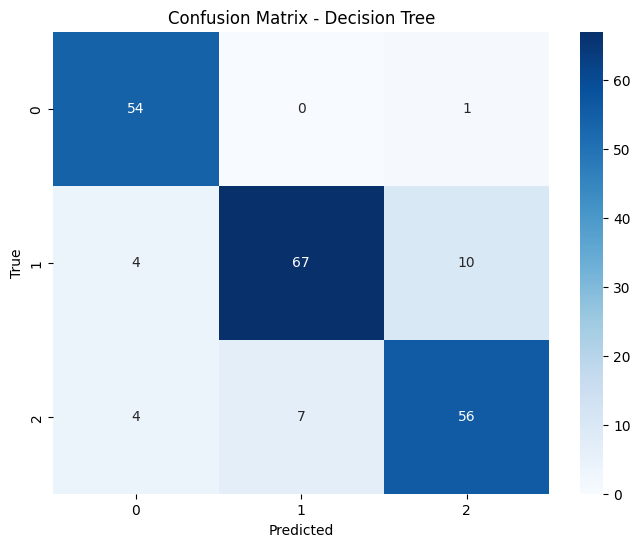

output for split 2
176 out of 203 predictions correct
Accuracy 0.8669950738916257
[[51  0  4]
 [ 1 72  8]
 [ 4 10 53]]
              precision    recall  f1-score   support

   high risk       0.91      0.93      0.92        55
    low risk       0.88      0.89      0.88        81
    mid risk       0.82      0.79      0.80        67

    accuracy                           0.87       203
   macro avg       0.87      0.87      0.87       203
weighted avg       0.87      0.87      0.87       203

[   2   12   26   27   36   37   49   50   51   52   56   57   69   71
   72   79   83   85   91   94  105  110  111  120  123  129  136  138
  145  147  164  175  191  196  197  198  205  208  216  223  226  227
  229  230  233  235  236  237  241  244  247  248  255  258  266  267
  283  286  287  301  305  319  320  332  340  342  344  345  351  357
  359  361  368  370  372  374  378  382  384  387  394  431  433  434
  443  445  448  454  468  472  482  485  488  491  493  505  515  516
  5

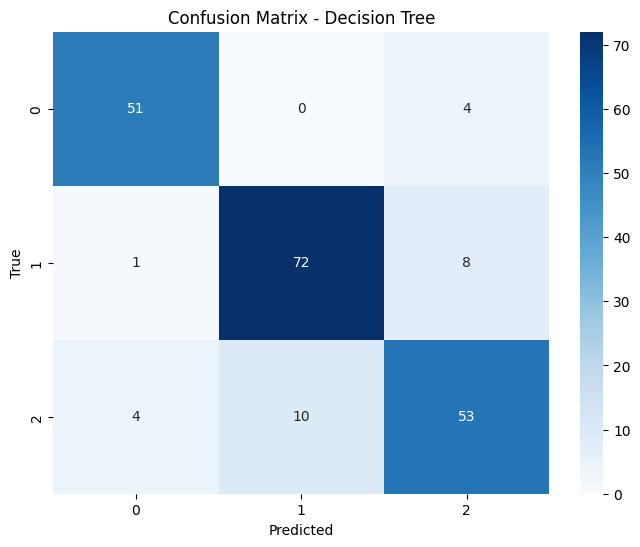

output for split 3
166 out of 203 predictions correct
Accuracy 0.8177339901477833
[[46  2  6]
 [ 3 65 14]
 [ 4  8 55]]
              precision    recall  f1-score   support

   high risk       0.87      0.85      0.86        54
    low risk       0.87      0.79      0.83        82
    mid risk       0.73      0.82      0.77        67

    accuracy                           0.82       203
   macro avg       0.82      0.82      0.82       203
weighted avg       0.82      0.82      0.82       203

[   1    3    6    7    8   11   15   17   18   24   30   31   34   35
   41   60   62   65   76   80   81   82   86   89   93   97   98   99
  109  122  124  128  130  131  133  153  157  163  168  169  171  178
  185  190  192  194  203  221  222  224  225  232  240  243  246  257
  259  262  263  268  271  273  280  282  285  288  290  296  298  302
  303  310  315  316  317  327  331  335  336  346  348  349  352  375
  383  386  389  390  395  402  404  407  411  416  421  426  430  442
  4

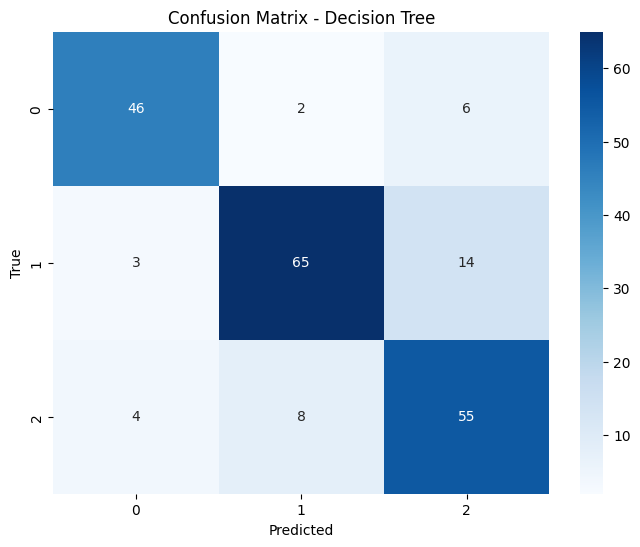

output for split 4
163 out of 203 predictions correct
Accuracy 0.8029556650246306
[[47  3  4]
 [ 3 60 18]
 [ 2 10 56]]
              precision    recall  f1-score   support

   high risk       0.90      0.87      0.89        54
    low risk       0.82      0.74      0.78        81
    mid risk       0.72      0.82      0.77        68

    accuracy                           0.80       203
   macro avg       0.81      0.81      0.81       203
weighted avg       0.81      0.80      0.80       203

[   4    5    9   10   19   23   25   28   39   43   44   47   58   68
   70   73   75   87   96  102  106  107  116  119  137  139  140  149
  151  161  162  172  177  181  184  201  212  214  215  217  231  234
  238  249  250  251  252  254  269  272  275  278  279  281  284  293
  294  309  311  313  321  328  329  337  338  354  355  360  362  364
  371  373  381  388  401  409  410  414  415  424  432  435  439  440
  444  446  459  464  465  466  469  473  483  487  490  494  497  501
  5

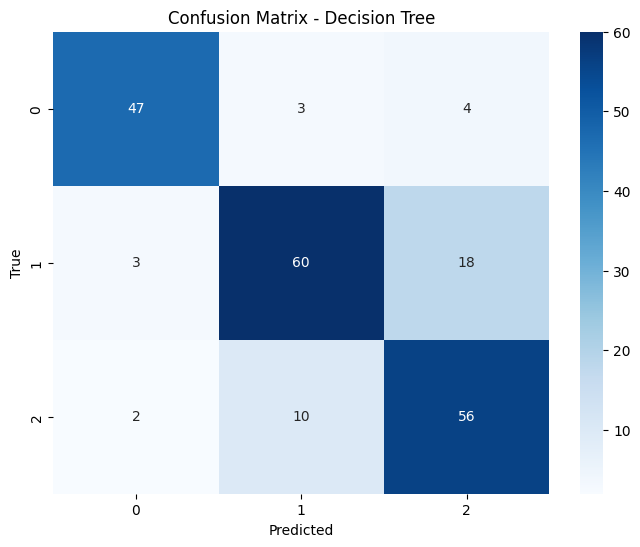

output for split 5
177 out of 202 predictions correct
Accuracy 0.8762376237623762
[[50  1  3]
 [ 0 67 14]
 [ 2  5 60]]
              precision    recall  f1-score   support

   high risk       0.96      0.93      0.94        54
    low risk       0.92      0.83      0.87        81
    mid risk       0.78      0.90      0.83        67

    accuracy                           0.88       202
   macro avg       0.89      0.88      0.88       202
weighted avg       0.88      0.88      0.88       202

[  20   21   22   29   38   40   42   45   54   61   63   64   74   77
   84   88   90   92  100  103  104  108  112  113  125  126  134  141
  142  143  144  146  150  159  160  166  167  173  188  195  199  200
  204  206  209  210  213  242  245  261  264  265  274  276  277  300
  306  308  312  314  322  323  324  325  330  333  334  339  341  343
  347  350  356  363  365  369  377  379  380  385  396  397  412  420
  423  427  429  437  438  447  451  461  462  467  471  474  475  484
  5

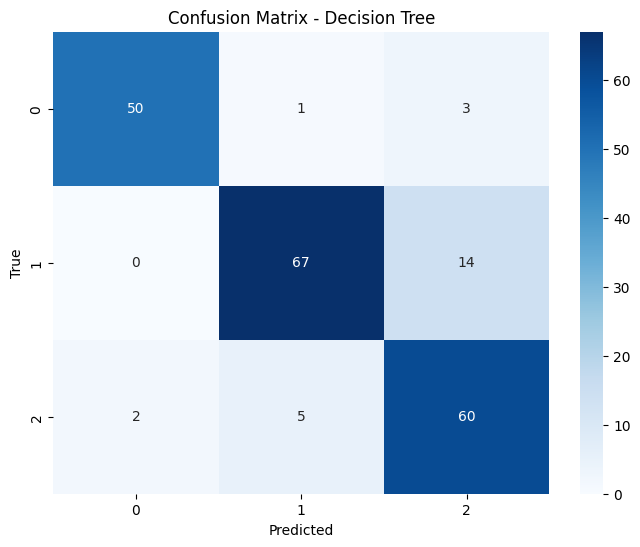

final mean result 0.8471687070184852
[np.float64(0.8471687070184852)]
0.8471687070184852


In [ ]:
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

def DT():
    clf_dt = DecisionTreeClassifier()
    clf_dt.fit(X_train, y_train)
    y_predict = clf_dt.predict(X_test)
    correct = np.sum(y_predict == y_test)
    print("%d out of %d predictions correct" % (correct, len(y_predict)))
    score.append(correct / len(y_predict))
    print("Accuracy", correct / len(y_predict))
    print(confusion_matrix(y_test, y_predict))
    print(classification_report(y_test, y_predict))
    print(test_index)
    print(y_test)
    print(y_predict)

    # Plot confusion matrix
    cm = confusion_matrix(y_test, y_predict)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, cmap="Blues")
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix - Decision Tree')
    plt.show()

if __name__ == "__main__":
    s_m = []
    kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    score = []
    i = 1

    for train_index, test_index in kf.split(dataset, dataset["RiskLevel"]):
        X_train = dataset.iloc[train_index, 0:6].values
        X_test = dataset.iloc[test_index, 0:6].values
        y_train = dataset.iloc[train_index, 6].values
        y_test = dataset.iloc[test_index, 6].values
        print("output for split", i)
        DT()
        i += 1

    m = np.mean(score)
    s_m.append(m)
    print("final mean result", m)
    print(s_m)
    Best = np.max(s_m)
    print(Best)


<a id="15"></a> <br>
# 9. Conclusion

# Decision-Tree Classifier model using both gini index and entropy have only very very small difference in model accuracy and training set accuracy, so there is no sign of overfitting.*italicized text*